# Example: Wave Module 
The following example runs an application of the wave module to: generate a capture length matrix, calculate MAEP, and plot the scatter diagrams.
The wave module source code is in the [\\MHKiT\wave](https://code.primre.org/mhkit/mhkit-python/tree/master/mhkit/wave) directory.

Start by importing the necessary modules:

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from mhkit.wave import performance, graphics

### Getting Started (Generating Basic Capture Length Matrices)

Now we will generate a few matrices for example data.  In a real application, the user would provide these values.  These values are expected to be in a pandas series for several of the functions in the device module.

In [2]:
#generating an array of 1,000,000 values to represent sig wave height
np.random.seed(1) #set random seed
Hm0 = pd.Series(np.random.rayleigh(2, 1000000)) 

#generating 1,000,000 values to represent peak period values, assuming normal dist.
Te = pd.Series(np.random.normal(4.5, .7, 1000000)) 

#generating 1,000,000 random power values
Power = pd.Series(np.random.normal(200, 40, 1000000)) 

#generating 1,000,000 random omnidirectional wave flux values
J = pd.Series(np.random.normal(300, 8, 1000000))

It is important that these matrices have the same size for data alignment purposes.  The data can be in pandas Series as well for time series data, but the module will treat most data as numpy arrays.

Soon, we can create our capture length matrices, as specified by the IEC/TS 62600-100.  But first, we need to calculate our capture lengths and generate our bin values as an array indicate the centers of each bin. 

The following operations are how you generate the five matrices specified by the IEC/TS 62600-100.  We also generate a frequency matrix for convenience.


In [3]:
L = performance.capture_length(Power, J) #calculating capture length with corresponding values in series data

Hm0_bins = np.arange(0, Hm0.max() + .5, .5) #arg1 is list to bin, arg2 is step size. returns list starting at 0.
Te_bins = np.arange(0, Te.max() + 1, 1)

#the necessary clmats from the IEC/TS 62600-100
clmats = {}
clmats['mean'] = performance.capture_length_matrix(Hm0, Te, L, 'mean', Hm0_bins, Te_bins)
clmats['std'] = performance.capture_length_matrix(Hm0, Te, L, 'std', Hm0_bins, Te_bins)
clmats['count'] = performance.capture_length_matrix(Hm0, Te, L, 'count', Hm0_bins, Te_bins)
clmats['min'] = performance.capture_length_matrix(Hm0, Te, L, 'min', Hm0_bins, Te_bins)
clmats['max'] = performance.capture_length_matrix(Hm0, Te, L, 'max', Hm0_bins, Te_bins)

#frequency matrix for convenience
clmats['freq'] = performance.capture_length_matrix(Hm0, Te, L,'frequency', Hm0_bins, Te_bins)

Let's see what the data in the mean matrix looks like.  Keep in mind that this data has been artificially generated, so it may not be representative of what a real-world scatter diagram would look like.

In [4]:
print(clmats['mean'])

      0.0       1.0       2.0       3.0       4.0       5.0       6.0  \
0.0   NaN       NaN  0.677108  0.661884  0.667854  0.669410  0.667463   
0.5   NaN       NaN  0.659457  0.666861  0.669235  0.667149  0.667563   
1.0   NaN       NaN  0.673245  0.667466  0.666974  0.666094  0.668441   
1.5   NaN  0.462755  0.648711  0.667925  0.667478  0.666961  0.669453   
2.0   NaN  0.571597  0.668060  0.667173  0.667399  0.666887  0.669135   
2.5   NaN  0.670029  0.665025  0.668533  0.666878  0.666313  0.667502   
3.0   NaN  0.738043  0.668574  0.666087  0.666229  0.667578  0.669056   
3.5   NaN  0.677570  0.660034  0.665847  0.667352  0.667819  0.669073   
4.0   NaN       NaN  0.674354  0.666644  0.666941  0.666739  0.666447   
4.5   NaN       NaN  0.670379  0.666388  0.666439  0.667825  0.667666   
5.0   NaN  0.670436  0.660289  0.662873  0.665616  0.666663  0.665197   
5.5   NaN       NaN  0.648921  0.664406  0.666569  0.665054  0.665372   
6.0   NaN       NaN  0.707083  0.669781  0.662765  

### Power Matrices
The IEC/TS 62600-100 specifies that the power matrix should be generated from the capture length matrix.  The following is an example of how to do that.  To generate the power matrix, you need to have a matrix of the wave energy flux, so we make one, then we generate the power matrices.

In [5]:
jmat = performance.wave_energy_flux_matrix(Hm0, Te, J, 'mean', Hm0_bins, Te_bins)

avgpowmat = performance.power_matrix(clmats['mean'], jmat)
stdpowmat = performance.power_matrix(clmats['std'], jmat)

The `performance.capture_length_matrix` function can also be used as an arbitrary scatter plot generator. To do this, simply pass a different Series in the place of capture length (L).  For example, while not specified by the IEC standards, if the user doesn't have the omnidirectional wave flux, the average power matrix could hypothetically be generated in the following manner:

In [6]:
avgpowmat_not_standard = performance.capture_length_matrix(Hm0, Te, Power, 'mean', Hm0_bins, Te_bins)

A little bit more advanced use of the capture length matrix would be to pass a callable function into the statistic argument. That's right, this is a higher order function!  For example, suppose that we wanted to generate a matrix with the variance of the capture length.  We could achieve this by passing the numpy.variance function into the `performance.capture_length_matrix` function we could also achieve this by the following method:  

In [7]:
# demonstration of passing a callable function on a list to the matrix generator
variance_matrix = performance.capture_length_matrix(Hm0, Te, L, np.var, Hm0_bins, Te_bins)

print(variance_matrix)

      0.0       1.0       2.0       3.0       4.0       5.0       6.0  \
0.0   NaN       NaN  0.024437  0.018971  0.018376  0.017840  0.016689   
0.5   NaN       NaN  0.015523  0.017385  0.018224  0.017915  0.017719   
1.0   NaN       NaN  0.017966  0.018095  0.017995  0.018252  0.018260   
1.5   NaN  0.000000  0.017102  0.017878  0.018233  0.018122  0.018412   
2.0   NaN  0.005190  0.018875  0.018307  0.017959  0.018220  0.018412   
2.5   NaN  0.000000  0.017018  0.018358  0.018309  0.018094  0.018427   
3.0   NaN  0.007879  0.018596  0.017985  0.018174  0.018028  0.018209   
3.5   NaN  0.009713  0.020080  0.018357  0.017993  0.018269  0.018116   
4.0   NaN       NaN  0.017482  0.018770  0.018126  0.017923  0.018495   
4.5   NaN       NaN  0.021293  0.017733  0.018342  0.017982  0.017796   
5.0   NaN  0.000000  0.013005  0.017788  0.018219  0.018278  0.018115   
5.5   NaN       NaN  0.018289  0.017809  0.018210  0.018139  0.017777   
6.0   NaN       NaN  0.014543  0.016871  0.018684  

### MAEP
There are two ways to calculate MAEP.  One is from a scatter diagram, the other is from time-series data.

In [8]:
maep_timeseries = performance.mean_annual_energy_production_timeseries(L, J)
print("MAEP from Timeseries =", maep_timeseries)

maep_matrix = performance.mean_annual_energy_production_matrix(clmats['mean'], jmat, clmats['freq'])
print("MAEP from Scatter Diagram =",maep_matrix)


MAEP from Timeseries = 1753073.5377000887
MAEP from Scatter Diagram = 1754328.6997311334


### Graphics
Printing the results of these calculations to standard output can look a little bit messy.  Let's try graphing the outputs using the graphics module's `plot_scatter_diagram` function.  It is important to note that the plotting function expects the step size between bins to be linear.

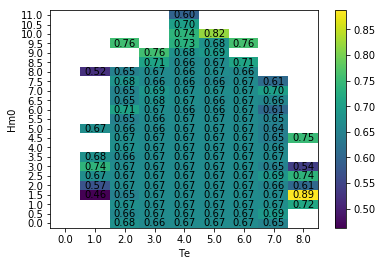

In [9]:
graphics.plot_matrix(clmats['mean'])

The plotting function only requires the matrix being input to generate a plot, but it also takes several other arguements.
The list of optional arguents are: `title, xlabel, ylabel, zlabel, size, and cmap`. The `cmap` argument can take any of the matplotlib colormap options.  The default values for these are: `title='title', xlabel='te', ylabel='Hm0', zlabel='', size=(12,8), cmap='jet'`The following is an example with all of these options being used.

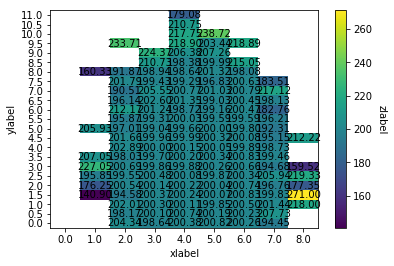

In [10]:
basicplot = graphics.plot_matrix(avgpowmat, \
                                          xlabel='xlabel', ylabel='ylabel', \
                                          zlabel='zlabel')

# Kelley's notes:  
- Need to update example to refer to mhkit.wave.performance, etc to make sure it's clear which module we are using
- Need device to make examples have similar structure and reference source code
- it would be nice to comment each line of code so that it is clear what the input parameters are doing. 

For example: 

`results = mhkit.qc.check_range(results['cleaned_data'], [-50, 50]) #applies check_range method to 'cleaned data' column of results, looks for data outside of [-50,50] range`

Or:

`results = mhkit.qc.check_range(results['cleaned_data'], [-50, 50]) #dataframe = mhkit.qc.check_range(dataframe['column'], [min, max])`